In [1]:
from article_process import ArticleLM

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
path_to_data = '/Users/stephanie/data/newsela_article_corpus_2016-01-29'
path_to_kenlm = '/Users/stephanie/github/kenlm'
path_to_arpa = path_to_kenlm + '/lm'

In [4]:
articleLM = ArticleLM(path_to_data, path_to_kenlm, path_to_arpa, 5, 'grade_level', True)

In [5]:
len(articleLM.metadata_split[articleLM.metadata_split.train_val_test == 'train'])

8612

In [6]:
len(articleLM.metadata_split[articleLM.metadata_split.train_val_test == 'val'])

1076

## Builds the processed sentences that I need for KenLM

In [7]:
articleLM.build_data()

In [ ]:
articleLM.train_all_arpas()

## Printing out stats

how many sentences there are in training set, indexed by grade level?

In [15]:
for g in articleLM.level_sentences.get('train').keys():
    print(g, len(articleLM.level_sentences.get('train').get(g)))

8 42922
5 59391
3 18637
12 71313
9 29239
7 52444
4 72366
2 7742
6 47590
11 54


In [16]:
# Number of sentences, train
sentence_len = 0
for g in articleLM.level_sentences.get('train').keys():
    sentence_len+=len(articleLM.level_sentences.get('train').get(g))
    
print(sentence_len)

401698


In [17]:
# Number of sentences, validation
sentence_len = 0
for g in articleLM.level_sentences.get('val').keys():
    sentence_len+=len(articleLM.level_sentences.get('val').get(g))
print(sentence_len)

51067


how many articles there are in each set, indexed by grade level?

In [18]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='train'].grade_level.value_counts()

12    1660
4     1399
5     1167
7     1092
6      943
8      922
9      699
3      503
2      225
11       2
Name: grade_level, dtype: int64

In [19]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='train'].grade_level.value_counts().sum()

8612

In [20]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='val'].grade_level.value_counts()

12    205
4     166
5     151
7     150
6     120
8     115
9      88
3      55
2      26
Name: grade_level, dtype: int64

## Comparing perplexities to Classify Sentences

In [23]:
# sentence_guesses = articleLM.compute_all_sentences_best_guess([2, 3, 4, 5, 6, 7, 8, 9])

Grade Level 11 failed
Grade Level 13 failed


Grade Level 11 failed


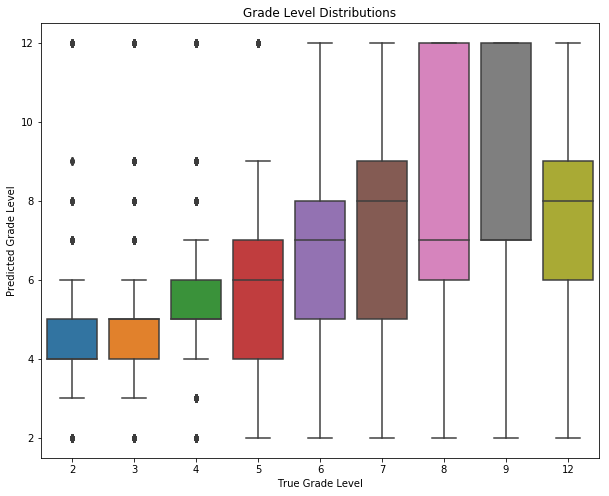

In [21]:
sentence_guesses = articleLM.plot_sentence_distribution([2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(sentence_guesses.level, sentence_guesses.best_guess)

In [23]:
cm

array([[ 138,  126,  496,  118,  139,   28,   21,    8,   29],
       [ 158,  169,  594,  675,  155,  170,   94,   53,   49],
       [ 377,  446,  603, 3078, 1999,  841,  607,  203,  393],
       [  92,  500, 2280,  232, 1530, 1759,  491,  326,  432],
       [  98,  180, 1194, 1058,   91,  635, 1467,  396,  847],
       [  70,  123,  642, 1200,  665,  105, 1432, 1926, 1385],
       [  45,   76,  410,  438,  965, 1094,   51,  203, 2034],
       [  37,   36,  171,  299,  243, 1222,  148,   63, 1460],
       [ 168,  135,  501,  699, 1267, 1323, 2537, 1774,  745]])

In [24]:
accuracy_score(sentence_guesses.level, sentence_guesses.best_guess)

0.043021912389605815

In [25]:
len(sentence_guesses[sentence_guesses.level == sentence_guesses.best_guess]) / len(sentence_guesses)

0.043021912389605815

Sentence level accuracy is really poor!

## Article level
Instead of trying to predict _each sentence_, we will pick the best grade level by categorizing the entire article after classifying the sentences. In this instance, I'm using means to find the best classification.

In [45]:
article_train_df = articleLM.compute_article_to_sentence_guess('train')

iteration 100, article ('Nigeria-ebolafree', 8)
iteration 200, article ('africa-economy', 12)
iteration 300, article ('alaskan-13yo', 8)
iteration 400, article ('anthem-manuscript', 12)
iteration 500, article ('artist-housing', 12)
iteration 600, article ('aviation-tooling', 4)
iteration 700, article ('bat-survival', 6)
iteration 800, article ('bird-rollercoaster', 4)
iteration 900, article ('border-debate', 5)
iteration 1000, article ('brianwilliams-suspend', 4)
iteration 1100, article ('calitrain-cheaptix', 12)
iteration 1200, article ('cdc-obesity', 7)
iteration 1300, article ('children-centralamerica', 4)
iteration 1400, article ('china-pollutionapp', 6)
iteration 1500, article ('church-fires', 6)
iteration 1600, article ('clinton-presannounce', 4)
iteration 1700, article ('combat-women', 7)
iteration 1800, article ('corporal-punishment', 12)
iteration 1900, article ('curbing-cyberkids', 5)
iteration 2000, article ('diamond-heist', 7)
iteration 2100, article ('distracted-biking', 7

In [46]:
article_val_df = articleLM.compute_article_to_sentence_guess('val')

iteration 100, article ('beyonce-embargo', 7)
iteration 200, article ('civilwar-blacksoldiers', 8)
iteration 300, article ('ebola-doctor', 12)
iteration 400, article ('halloween-sales', 7)
iteration 500, article ('linguistics-huh', 4)
iteration 600, article ('nkorea-nuclear', 5)
iteration 700, article ('prison-design', 4)
iteration 800, article ('sony-nkorea', 12)
iteration 900, article ('uncletom-dc', 6)


In [8]:
# article_train_df, means_train = articleLM.compute_article_best_guess('train')

In [10]:
# article_train_df.rename(columns={'min_perplexity': 'predicted_gl'}, inplace=True)

In [47]:
article_train_df[['predicted_gl', 'true_gl', 'article']].head()

,predicted_gl,true_gl,article
0,8,8,10dollarbill-woman
1,8,8,10dollarbill-woman
2,8,8,10dollarbill-woman
3,8,8,10dollarbill-woman
4,8,8,10dollarbill-woman


## Linear Regression to pick best article

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
article_train_df[['true_gl', 'article', 'predicted_gl']].pivot_table(columns='predicted_gl',
                                                                     index=['true_gl', 'article'],
                                                                     aggfunc=lambda x:  len(x),
                                                                    fill_value=0).head()

predicted_gl                 2   3   4   5   6   7   8   9   12
true_gl article                                                
2       17century-selfies  7651  18  51   7   5   2   0   0   8
        Hospital-bootcamp    41   0   1   1   0   0   0   0   0
        Iditarod-finish      60   0   0   0   0   0   0   0   0
        adidas-mascots       44   0   1   0   0   0   0   0   0
        africa-outlook       45   0   0   0   0   0   0   0   0

In [50]:
article_pred_gl_count = \
    np.array(article_train_df[['true_gl', 'article', 'predicted_gl']].pivot_table(columns='predicted_gl',
                                                                     index=['true_gl', 'article'],
                                                                     aggfunc=lambda x:  len(x),
                                                                    fill_value=0))

In [51]:
y = np.array(article_train_df[['true_gl', 'article', 'predicted_gl']].pivot_table(columns='predicted_gl',
                                                                     index=['true_gl', 'article'],
                                                                     aggfunc=lambda x:  len(x),
                                                                    fill_value=0).reset_index().true_gl)

In [52]:
X = np.divide(article_pred_gl_count,article_pred_gl_count.sum(axis=1).reshape(len(article_pred_gl_count),1))

In [53]:
clf = LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
article_val_pred_gl_count = \
    np.array(article_val_df[['true_gl', 'article', 'predicted_gl']].pivot_table(columns='predicted_gl',
                                                                     index=['true_gl', 'article'],
                                                                     aggfunc=lambda x:  len(x),
                                                                    fill_value=0))

In [55]:
X_val = np.divide(article_val_pred_gl_count,
                  article_val_pred_gl_count.sum(axis=1).reshape(len(article_val_pred_gl_count),
                                                                1))

In [56]:
val_df = article_val_df[['true_gl', 'article', 'predicted_gl']].pivot_table(columns='predicted_gl',
                                                                     index=['true_gl', 'article'],
                                                                     aggfunc=lambda x:  len(x),
                                                                    fill_value=0).reset_index()[['true_gl', 'article']]

val_df.loc[:,'predicted_gl'] = list(clf.predict(X_val))

In [57]:
val_df.loc[:,'predicted_gl'] = val_df.predicted_gl.astype('int')

### Accuracy for linear regression outputs

In [58]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [59]:
cm = confusion_matrix(val_df.true_gl, val_df.predicted_gl)

In [60]:
cm

array([[ 0,  2, 20,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 20, 20,  1,  4,  0,  0,  0,  0,  0],
       [ 0,  1,  7, 86, 38, 16,  4,  1,  0,  0,  0],
       [ 0,  0,  8, 54, 51, 14,  5,  2,  1,  0,  0],
       [ 0,  0,  3,  9, 35, 33, 15,  8,  3,  1,  0],
       [ 0,  0,  0,  1, 11, 39, 61, 12, 10,  6,  0],
       [ 0,  0,  0,  5, 11,  9, 19, 32, 17,  7,  2],
       [ 0,  0,  0,  3,  7, 13,  9, 15, 12, 12,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7, 24, 56, 70, 24,  1,  0,  0]])

In [61]:
val_df.loc[:,'within_1_grade'] = list(map(lambda x,y: 1
                                         if (y >= x-1 and y <= x+1)
                                         else 0 , val_df.true_gl, val_df.predicted_gl))

#### Accuracy:

In [62]:
len(val_df[val_df.within_1_grade == 1]) * 100. / len(val_df)

53.25749741468459

### Scores for binary classification using linear regression

In [63]:
val_df.loc[:,'true_easy'] = [1 if x <= 5 else 0 for x in val_df.true_gl]
val_df.loc[:,'predicted_easy'] = [1 if x <= 5 else 0 for x in val_df.predicted_gl]

In [64]:
accuracy_score(val_df.true_easy, val_df.predicted_easy)

0.8293691830403309

In [65]:
f1_score(val_df.true_easy, val_df.predicted_easy)

0.7290640394088671

## Scores for using means, validation set

In [8]:
article_val_df, means_val = articleLM.compute_article_best_guess('val')

Grade Level 11 failed
iteration 100, article ('beyonce-embargo', 7)
iteration 200, article ('civilwar-blacksoldiers', 8)
iteration 300, article ('ebola-doctor', 12)
iteration 400, article ('halloween-sales', 7)
iteration 500, article ('linguistics-huh', 4)
iteration 600, article ('nkorea-nuclear', 5)
iteration 700, article ('prison-design', 4)
iteration 800, article ('sony-nkorea', 12)
iteration 900, article ('uncletom-dc', 6)


In [9]:
article_train_df, means_train = articleLM.compute_article_best_guess('train')

iteration 100, article ('Nigeria-ebolafree', 8)
iteration 200, article ('africa-economy', 12)
iteration 300, article ('alaskan-13yo', 8)
iteration 400, article ('anthem-manuscript', 12)
iteration 500, article ('artist-housing', 12)
iteration 600, article ('aviation-tooling', 4)
iteration 700, article ('bat-survival', 6)
iteration 800, article ('bird-rollercoaster', 4)
iteration 900, article ('border-debate', 5)
iteration 1000, article ('brianwilliams-suspend', 4)
iteration 1100, article ('calitrain-cheaptix', 12)
iteration 1200, article ('cdc-obesity', 7)
iteration 1300, article ('children-centralamerica', 4)
iteration 1400, article ('china-pollutionapp', 6)
iteration 1500, article ('church-fires', 6)
iteration 1600, article ('clinton-presannounce', 4)
iteration 1700, article ('combat-women', 7)
iteration 1800, article ('corporal-punishment', 12)
iteration 1900, article ('curbing-cyberkids', 5)
iteration 2000, article ('diamond-heist', 7)
iteration 2100, article ('distracted-biking', 7

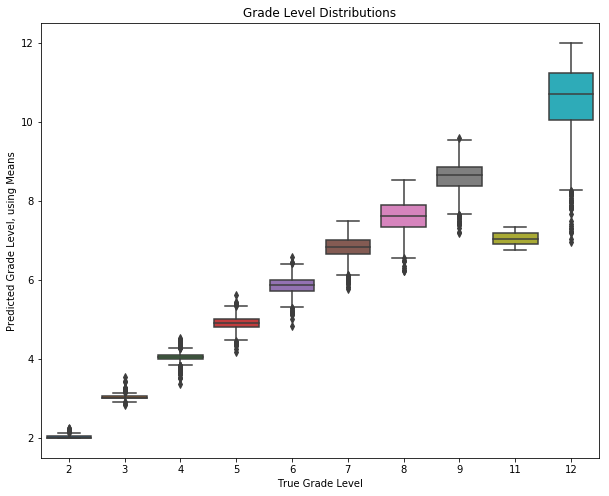

In [10]:
articleLM.plot_article_best_grade_levels(means_train)

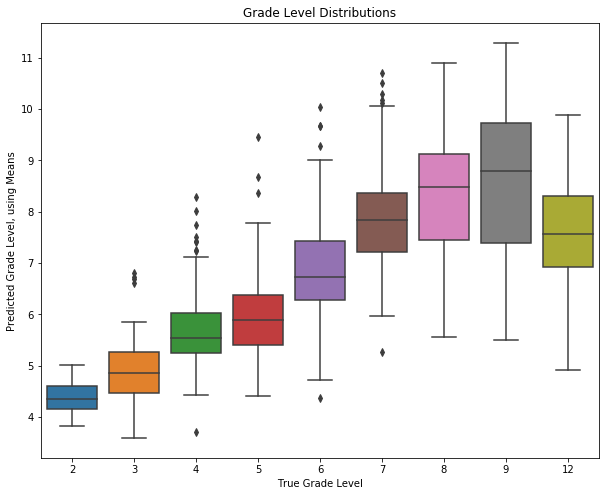

In [11]:
articleLM.plot_article_best_grade_levels(means_val)

In [11]:
means_val.head()

,article,true_gl,predicted_gl
0,10dollarbill-woman,6,6.915354
1,10dollarbill-woman,12,7.465843
2,20dollarbill-female,6,6.404762
3,3d-indoormap,6,6.733333
4,401k-literacy,12,6.944444


In [10]:
(grade_level_cm, raw_accuracy, banded_accuracy,
 binary_cm, binary_accuracy, binary_f1) = articleLM.compute_scores_grade_level(means_val)

In [11]:
grade_level_cm

array([[ 0,  2, 21,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 27, 14,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 11, 98, 32,  9,  2,  0,  0,  0,  0],
       [ 0,  0, 12, 64, 47,  9,  2,  1,  0,  0,  0],
       [ 0,  0,  3, 14, 48, 25, 12,  4,  1,  0,  0],
       [ 0,  0,  0,  2, 27, 55, 38, 12,  6,  0,  0],
       [ 0,  0,  0,  8, 11, 14, 39, 21,  9,  0,  0],
       [ 0,  0,  0,  4, 12, 12, 15, 16, 16,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 10, 37, 75, 53,  6,  0,  0,  0]])

In [12]:
raw_accuracy

0.24301964839710444

In [15]:
banded_accuracy

0.6122026887280249

In [13]:
binary_cm

array([[566,  42],
       [106, 253]])

In [14]:
binary_accuracy

0.8469493278179938

In [16]:
binary_f1

0.8843749999999999

## Scores for using means, test set

iteration 100, article ('beef-grassfed', 3)
iteration 200, article ('climate-violence', 7)
iteration 300, article ('europemigrant-minors', 5)
iteration 400, article ('hiring-formerfelons', 7)
iteration 500, article ('malaysia-ukrainecrash', 12)
iteration 600, article ('obama-king', 5)
iteration 700, article ('projectsyndicate-racismhistory', 12)
iteration 800, article ('space-voyager', 7)
iteration 900, article ('virtual-surgery', 12)


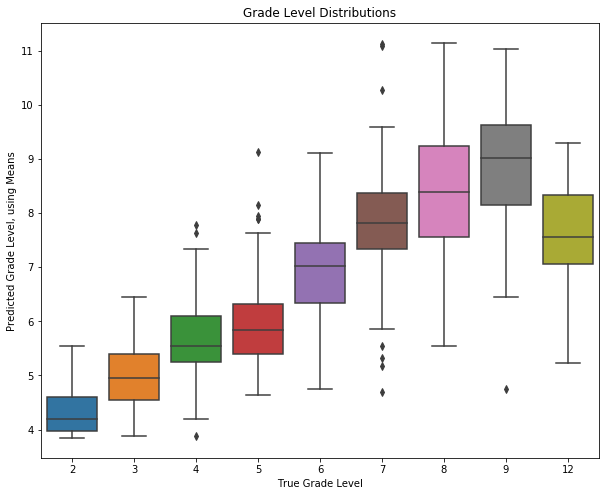

In [16]:
article_test_df, means_test = articleLM.compute_article_best_guess('test')
articleLM.plot_article_best_grade_levels(means_test)

In [18]:
(grade_level_cm, raw_accuracy, banded_accuracy,
 binary_cm, binary_accuracy, binary_f1) = articleLM.compute_scores_grade_level(means_test)

In [19]:
grade_level_cm

array([[ 0,  7, 15,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3, 21, 16,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  9, 96, 34,  7,  0,  0,  0,  0,  0],
       [ 0,  0, 11, 84, 46, 14,  1,  1,  0,  0,  0],
       [ 0,  0,  2, 10, 34, 40, 10,  2,  0,  0,  0],
       [ 0,  0,  1,  4, 12, 47, 33,  7,  1,  2,  0],
       [ 0,  0,  0,  4, 13, 20, 31, 26,  7,  2,  0],
       [ 0,  0,  1,  0,  6,  5, 16, 24,  8,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7, 41, 84, 66,  6,  0,  0,  0]])

In [20]:
raw_accuracy

0.24498416050686378

In [21]:
banded_accuracy

0.6114044350580782

In [22]:
binary_cm

array([[544,  29],
       [108, 266]])

In [23]:
binary_accuracy

0.8553326293558606

In [24]:
binary_f1

0.8881632653061226

### Just for fun, check linear regression score too.

In [39]:
article_test_pred_gl_count = \
    np.array(article_test_df[['true_gl', 'article', 'predicted_gl']].pivot_table(columns='predicted_gl',
                                                                     index=['true_gl', 'article'],
                                                                     aggfunc=lambda x:  len(x),
                                                                    fill_value=0))

X_test = np.divide(article_test_pred_gl_count,
                  article_test_pred_gl_count.sum(axis=1).reshape(len(article_test_pred_gl_count),
                                                                1))

test_df = article_test_df[['true_gl', 'article', 'predicted_gl']].pivot_table(columns='predicted_gl',
                                                                     index=['true_gl', 'article'],
                                                                     aggfunc=lambda x:  len(x),
                                                                    fill_value=0).reset_index()[['true_gl', 'article']]

test_df.loc[:,'predicted_gl'] = list(clf.predict(X_test))
test_df.loc[:,'predicted_gl'] = test_df.predicted_gl.astype('int')

#### accuracy for regression outputs

In [40]:
test_df.loc[:,'within_1_grade'] = list(map(lambda x,y: 1
                                         if (y >= x-1 and y <= x+1)
                                         else 0 , test_df.true_gl, test_df.predicted_gl))

In [43]:
len(test_df[test_df.within_1_grade == 1]) * 100. / len(test_df)

test_df.loc[:,'true_easy'] = [1 if x <= 5 else 0 for x in test_df.true_gl]
test_df.loc[:,'predicted_easy'] = [1 if x <= 5 else 0 for x in test_df.predicted_gl]

accuracy_score(test_df.true_easy, test_df.predicted_easy)

0.8278775079197466

It's still not as good! Sticking with the means.